## भोपळ्याच्या किंमतीसाठी रेषीय आणि बहुपदीय पुनरावृत्ती - धडा 3

आवश्यक लायब्ररी आणि डेटासेट लोड करा. डेटाला एका डेटाफ्रेममध्ये रूपांतरित करा ज्यामध्ये डेटाचा एक उपसंच असेल:

- फक्त बशेलने किंमत दिलेले भोपळे मिळवा  
- दिनांक महिन्यात रूपांतरित करा  
- उच्च आणि निम्न किंमतींच्या सरासरीवरून किंमत मोजा  
- किंमतीला बशेल प्रमाणातील किंमतीचे प्रतिबिंबित रूपांतर करा  


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

स्कॅटरप्लॉट आपल्याला आठवण करून देते की आपल्याकडे फक्त ऑगस्ट ते डिसेंबरपर्यंतचा महिन्याचा डेटा आहे. रेखीय पद्धतीने निष्कर्ष काढण्यासाठी आपल्याला कदाचित अधिक डेटाची आवश्यकता आहे.


<AxesSubplot:xlabel='Month', ylabel='Price'>

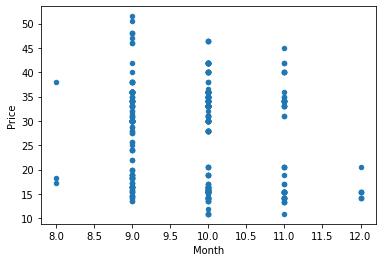

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

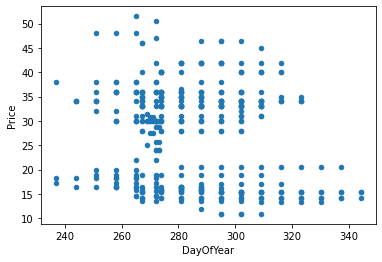

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


असे दिसते की परस्परसंबंध खूपच कमी आहे, पण काहीतरी अधिक महत्त्वाचे नाते आहे - कारण वरील प्लॉटमधील किंमतीचे बिंदू अनेक वेगळ्या गटांमध्ये दिसत आहेत. चला वेगवेगळ्या भोपळ्याच्या प्रकारांचे दाखवणारा एक प्लॉट तयार करूया:


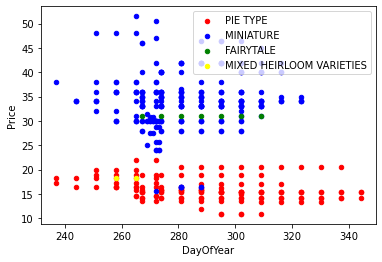

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

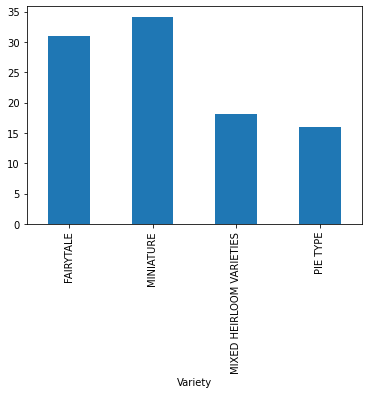

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

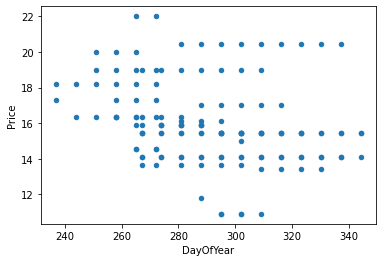

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### रेषीय प्रतिगमन

आम्ही Scikit Learn वापरून रेषीय प्रतिगमन मॉडेल प्रशिक्षण देणार आहोत:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


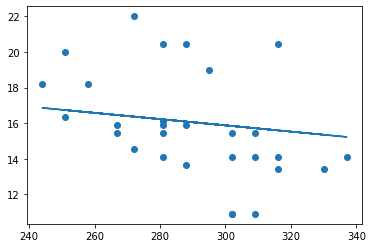

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### बहुपदीय प्रतिगमन

कधी कधी वैशिष्ट्ये आणि परिणाम यांच्यातील संबंध स्वाभाविकपणे रेषीय नसतो. उदाहरणार्थ, भोपळ्याच्या किंमती हिवाळ्यात (महिने=1,2) जास्त असू शकतात, नंतर उन्हाळ्यात (महिने=5-7) कमी होतात आणि पुन्हा वाढतात. रेषीय प्रतिगमन या संबंधाचा अचूक अंदाज लावू शकत नाही.

अशा परिस्थितीत, आपण अतिरिक्त वैशिष्ट्ये जोडण्याचा विचार करू शकतो. सोपा मार्ग म्हणजे इनपुट वैशिष्ट्यांपासून बहुपदांचा वापर करणे, ज्यामुळे **बहुपदीय प्रतिगमन** होईल. Scikit Learn मध्ये, आपण पाइपलाइन्स वापरून स्वयंचलितपणे बहुपदीय वैशिष्ट्ये पूर्व-गणना करू शकतो:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


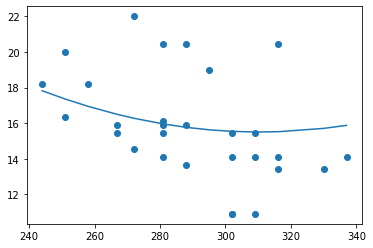

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### विविध प्रकारांचे एन्कोडिंग

आदर्श परिस्थितीत, आम्हाला वेगवेगळ्या भोपळ्याच्या प्रकारांसाठी किंमतींचा अंदाज एकाच मॉडेलचा वापर करून लावायचा आहे. प्रकार लक्षात घेण्यासाठी, आपल्याला प्रथम त्याला संख्यात्मक स्वरूपात रूपांतरित करावे लागेल, किंवा **एन्कोड** करावे लागेल. हे करण्याचे अनेक मार्ग आहेत:

* साधे संख्यात्मक एन्कोडिंग, जे विविध प्रकारांची एक टेबल तयार करेल आणि नंतर त्या टेबलमधील अनुक्रमांकाने प्रकाराचे नाव बदलून टाकेल. हे रेषीय प्रतिगमनासाठी (linear regression) सर्वोत्तम कल्पना नाही, कारण रेषीय प्रतिगमन अनुक्रमांकाच्या संख्यात्मक मूल्याचा विचार करते, आणि हे संख्यात्मक मूल्य किंमतीशी संख्यात्मकदृष्ट्या संबंधित असण्याची शक्यता कमी असते.
* वन-हॉट एन्कोडिंग, जे `Variety` स्तंभाला 4 वेगळ्या स्तंभांनी बदलून टाकेल, प्रत्येक प्रकारासाठी एक स्तंभ असेल, जो 1 असेल जर संबंधित रकाना दिलेल्या प्रकाराचा असेल, आणि अन्यथा 0 असेल.

खालील कोड दाखवतो की आपण प्रकाराचे वन-हॉट एन्कोडिंग कसे करू शकतो:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### विविधतेवर आधारित रेषीय प्रतिगमन

आता आपण वर दिलेल्या कोडचा वापर करू, पण `DayOfYear` ऐवजी इनपुट म्हणून आपली वन-हॉट-एनकोड केलेली विविधता वापरू:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


आम्ही इतर वैशिष्ट्यांचा वापर देखील याच पद्धतीने करून पाहू शकतो आणि त्यांना `Month` किंवा `DayOfYear` सारख्या संख्यात्मक वैशिष्ट्यांसह एकत्रित करू शकतो:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### बहुपद रिग्रेशन

बहुपद रिग्रेशन श्रेणीसंबंधी वैशिष्ट्यांसोबत वापरता येतो, जे वन-हॉट-एन्कोड केलेले असतात. बहुपद रिग्रेशन प्रशिक्षणासाठी कोड वर दिलेल्या उदाहरणासारखाच असेल.


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी कृपया लक्षात ठेवा की स्वयंचलित भाषांतरे त्रुटी किंवा अचूकतेच्या अभावाने युक्त असू शकतात. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर करून उद्भवलेल्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
